#Chapter 20

Hyperparameters

NLP with Deep Learning DNN


Its important where to start, 
For convecx loss function this does not matter.

in NN loss functions nearly always are not convex loss functions so this does matter.


Weight & (Step Size/Learning rate) are important

Batch Normalization ->
Normalise the batch after every layer.

In [4]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset,DataLoader

inputDim = 10
n = 1000
X = np.random.rand(n,inputDim)
y = np.random.randint(0,2,n)

tensor_x = torch.Tensor(X)
tensor_y = torch.Tensor(y)
Xy = TensorDataset(tensor_x,tensor_y)
Xy_loader = DataLoader(Xy,batch_size=16,shuffle=True,drop_last=True)
model = nn.Sequential(
    nn.Linear(inputDim,200),
    nn.ReLU(),
    nn.BatchNorm1d(num_features=200),
    nn.Dropout(0.5),
    nn.Linear(200,100),
    nn.Tanh(),
    nn.BatchNorm1d(num_features=100),
    nn.Linear(100,1),
    nn.Sigmoid()
)
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
loss_fn = nn.BCELoss()
nepochs = 100
for epoch in range(nepochs):
    for X,y in Xy_loader:
        batch_size = X.shape[0]
        y_hat = model(X.view(batch_size,-1))
        loss = loss_fn(y_hat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(float(loss))
with torch.no_grad():
    xt = torch.tensor(np.random.rand(1,inputDim))
    y2 = model(xt.float())
    print(y2.detach().numpy()[0][0])

ValueError: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])) is deprecated. Please ensure they have the same size.

torch.optim.Adam is one of the better optimizer


Dropout is a way of inforcing the generalization and reduces the over fitting
over fitting is a problem when you have a lot of pramaters to train.


In [ ]:
#implementing dropout
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset,DataLoader

inputDim = 10
n = 1000
X = np.random.rand(n,inputDim)
y = np.random.randint(0,2,n)

tensor_x = torch.Tensor(X)
tensor_y = torch.Tensor(y)
Xy = TensorDataset(tensor_x,tensor_y)
Xy_loader = DataLoader(Xy,batch_size=16,shuffle=True,drop_last=True)
model = nn.Sequential(
    nn.Linear(inputDim,200),
    nn.ReLU(),
    nn.BatchNorm1d(num_features=200),
    nn.Dropout(0.5),
    nn.Linear(200,100),
    nn.Tanh(),
    nn.BatchNorm1d(num_features=100),
    nn.Linear(100,1),
    nn.Sigmoid()
)

optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
loss_fn = nn.BCELoss()
nepochs = 100
for epoch in range(nepochs):
    for X,y in Xy_loader:
        batch_size = X.shape[0]
        y_hat = model(X.view(batch_size,-1))
        loss = loss_fn(y_hat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(float(loss))


with torch.no_grad():
    xt = torch.tensor(np.random.rand(1,inputDim))
    y2 = model(xt.float())
    print(y2.detach().numpy()[0][0])

    

Early Stopping

when training loss is decresing but the Validation loss increase at this point you might want to think about stopping

Hyperparameters

how do pick the number of layers

how do you the number of units

Activation function

Init Learning rate

Batch Size

Dropout ratio

Weight init

Learning Rate decay policy

Early Stopping 


No fixed way, to determine

In [5]:
from torchvision import datasets
from torchvision import transforms
import torch
import torch.nn as nn
import numpy as np


rootdir = '/Data_cfar10'
T = datasets.CIFAR10(rootdir,train=True,download=True)
V = datasets.CIFAR10(rootdir,train=False,download=True)

len(T)
len(V)
type(T)

X,y = T[12]


170499072it [00:33, 5033331.26it/s]                               


Extracting /Data_cfar10\cifar-10-python.tar.gz to /Data_cfar10
Files already downloaded and verified


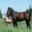

In [6]:
X

In [7]:
np.array(X).shape
32*32*3



3072

In [8]:
T = datasets.CIFAR10(rootdir,train=True,download=True,
                    transform=transforms.ToTensor())
V = datasets.CIFAR10(rootdir,train=False,download=True,
                    transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [9]:
tL = torch.utils.data.DataLoader(T,batch_size=64,shuffle=True,drop_last=True)
vL = torch.utils.data.DataLoader(V,batch_size=64,shuffle=True,drop_last=True)

In [10]:
model = nn.Sequential(
    nn.Linear(3072,100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(100,10),
    nn.LogSoftmax(dim=1)
)

In [11]:
loss_fn = nn.NLLLoss()

In [12]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,
                                                      len(tL))

In [13]:
nepochs = 2
for e in range(nepochs):
    eLoss = 0
    for X,y in tL:
        batch_size = X.shape[0]
        y_hat = model(X.view(batch_size,-1))
        loss = loss_fn(y_hat,y)
        eLoss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    print(float(eLoss))

1838.425048828125
1799.234619140625


In [14]:
c = 0
t = 0
with torch.no_grad():
    for Xv,yv in vL:
        batch_size = Xv.shape[0]
        y_hat = model(Xv.view(batch_size,-1))
        _,p = torch.max(y_hat,dim=1)
        t+=yv.shape[0]
        c+=int((p==yv).sum())
print(c/t)

0.10006009615384616
